In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import pickle
import matplotlib
from WEEP.weep import weep_batch, weep_plot 
from WEEP.plots import heatmap, view_wsi, plot_cancer_mask

### Importing the example tile dataframe

In [2]:
df_tile = pd.read_csv('./WEEP/examples/df_tile_example.csv')
print('List of unique WSIs in the tile df:{}'.format(df_tile.slide_name.unique().tolist()))
df_tile.head()

List of unique WSIs in the tile df:['wsi_1', 'wsi_2', 'wsi_3']


,Unnamed: 0,slide_name,tile_filename,pred_scores
0,0,wsi_1,wsi_1_19088_20280_41755_42947.jpg,0.583348
1,1,wsi_1,wsi_1_20281_21473_36983_38175.jpg,0.994196
2,2,wsi_1,wsi_1_20281_21473_41755_42947.jpg,0.790644
3,3,wsi_1,wsi_1_20281_21473_42948_44140.jpg,0.971728
4,4,wsi_1,wsi_1_21474_22666_36983_38175.jpg,0.997563


### Applying the WEEP to retrieve the df with selected tiles
Here, we import weep_batch to retrieve the tiles for the three example wsis

In [3]:
df_selected = weep_batch(df_tile, threshold = 0.717)
df_selected

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.59it/s]


,tile_filename,pred_scores,slide_name
0,wsi_1_73966_75158_31018_32210.jpg,0.995701,wsi_1
1,wsi_1_76352_77544_27439_28631.jpg,0.995698,wsi_1
2,wsi_1_57264_58456_14316_15508.jpg,0.995697,wsi_1
3,wsi_1_28632_29824_40562_41754.jpg,0.995697,wsi_1
4,wsi_1_60843_62035_20281_21473.jpg,0.995694,wsi_1
...,...,...,...
2178,wsi_3_51213_52403_71460_72650.jpg,0.717899,wsi_3
2179,wsi_3_52404_53594_90516_91706.jpg,0.717830,wsi_3
2180,wsi_3_75033_76223_64314_65504.jpg,0.717682,wsi_3
2181,wsi_3_76224_77414_66696_67886.jpg,0.717651,wsi_3


### Visualising the weep plot
WEEP plot is essentially a line plot to observe the change in slide-level prediction scores with the percentage of selected tiles for that WSI

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.65it/s]


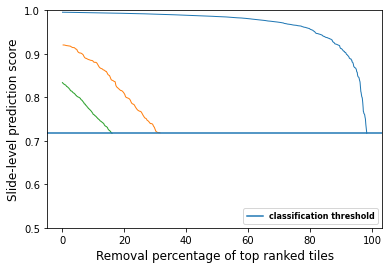

In [4]:
weep_plot(df_tile, threshold = 0.717)

### Visualising the WEEP selected regions over the WSI
#### Extracting the coordinates of the tile from the tile filename
Alternatively, coordinates can be provided separately

In [5]:
df_selected['new_name'] = df_selected.tile_filename.str.replace('.', '_').str.split('_').tolist()

df_selected['cor_x1'] = df_selected['new_name'].str[-5].astype(int)
df_selected['cor_y1'] = df_selected['new_name'].str[-3].astype(int)
df_selected['cor_x2'] = df_selected['new_name'].str[-4].astype(int)
df_selected['cor_y2'] = df_selected['new_name'].str[-2].astype(int)
df_selected
df_selected.head()

/tmp/ipykernel_2168197/212474067.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_selected['new_name'] = df_selected.tile_filename.str.replace('.', '_').str.split('_').tolist()


,tile_filename,pred_scores,slide_name,new_name,cor_x1,cor_y1,cor_x2,cor_y2
0,wsi_1_73966_75158_31018_32210.jpg,0.995701,wsi_1,"[wsi, 1, 73966, 75158, 31018, 32210, jpg]",73966,31018,75158,32210
1,wsi_1_76352_77544_27439_28631.jpg,0.995698,wsi_1,"[wsi, 1, 76352, 77544, 27439, 28631, jpg]",76352,27439,77544,28631
2,wsi_1_57264_58456_14316_15508.jpg,0.995697,wsi_1,"[wsi, 1, 57264, 58456, 14316, 15508, jpg]",57264,14316,58456,15508
3,wsi_1_28632_29824_40562_41754.jpg,0.995697,wsi_1,"[wsi, 1, 28632, 29824, 40562, 41754, jpg]",28632,40562,29824,41754
4,wsi_1_60843_62035_20281_21473.jpg,0.995694,wsi_1,"[wsi, 1, 60843, 62035, 20281, 21473, jpg]",60843,20281,62035,21473


#### Plotting the heatmap of the selected tile pixels 
Here the coordinates of the tiles are at 40x magnification of the WSI and tiles were created equivalent to 20x resolution 

471


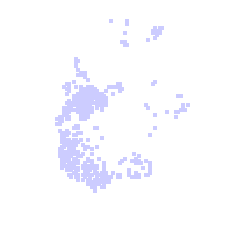

In [12]:
pixelscaling = 2.0
scaling_mask = 512.0
stride = 598
tumour_mask_path = './WEEP/examples/tumour_masks/tumour_masks/'

# plotting the heatmap for the first wsi
df_tmp = df_selected.copy()
df_tmp = df_tmp.reset_index(drop=True)
slide_names = df_tmp.slide_name.unique().tolist()
df_tmp = df_tmp.loc[df_tmp['slide_name'] == slide_names[2]].reset_index(drop=True)

path_to_mask = os.path.join(tumour_mask_path, '%s_AutoMask.pkl' % slide_names[2])
heatmap(df_tmp, path_to_mask = path_to_mask, stride=stride, scaling_mask=scaling_mask, 
        pixelscaling=pixelscaling, alpha = 0.2)


### Plotting the heatmap of the selected region over the WSI with cancer mask
Note: overlay of the tumour masks and the tile heatmap over the WSI is a bit distorted due to saving the low resolution wsi in jpg. Opening the wsi at low res is recommended using openslide or can be viewed using the function `view_wsi`in `plots.py` 

471


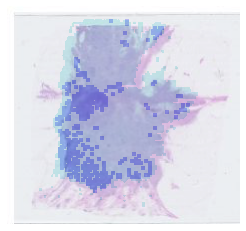

In [46]:
# if the path to the wsis is available
path_to_wsi = './WEEP/examples/wsis/wsi_3.jpg'
wsi = plt.imread(path_to_wsi)
plt.imshow(wsi)
plt.axis('off')
# view_wsi(path_to_wsi)
plot_cancer_mask(path_to_mask, alpha=0.2)
# plt.imshow()
heatmap(df_tmp, path_to_mask = path_to_mask, stride=stride, scaling_mask=scaling_mask, 
        pixelscaling=pixelscaling, alpha=0.2)